In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
base = automap_base()

# reflect the tables
base.prepare(autoload_with = engine)

In [6]:
# View all of the classes that automap found
base.classes.keys()

['measurement', 'station']

In [13]:
# Save references to each table
Measurement = base.classes.measurement
Station = base.classes.station

In [14]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [15]:
# Find the most recent date in the data set.
most_recent = session.query(func.max(Measurement.date)).first()
most_recent

('2017-08-23',)

<Axes: xlabel='Date', ylabel='Inches'>

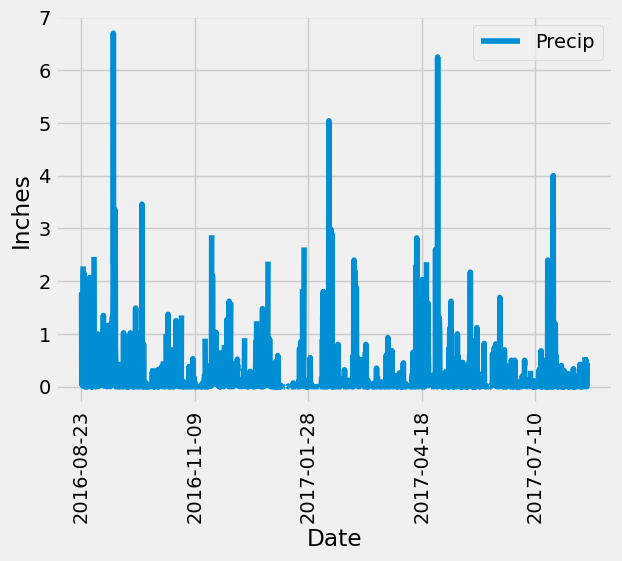

In [35]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
year_back = dt.date(2017,8,23)-dt.timedelta(days=365)
year_back

# Perform a query to retrieve the data and precipitation scores
data_precip = session.query(Measurement.date,Measurement.prcp).\
    filter(Measurement.date >= year_back).all()


# Save the query results as a Pandas DataFrame. Explicitly set the column names
precip_df = pd.DataFrame(data_precip,columns=["Date", "Precip"])

# Sort the dataframe by date
precip_df = precip_df.sort_values("Date")
precip_df.head()

# Use Pandas Plotting with Matplotlib to plot the data
precip_df.plot(x="Date", y="Precip", xlabel="Date", ylabel="Inches", rot=90)

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data


,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [40]:
# Design a query to calculate the total number of stations in the dataset
number_stations = session.query(Station.id).distinct().count()
number_stations

9

In [79]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [99]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active = session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
order_by(func.count(Measurement.station).desc()).first()[0]

session.query(func.min(Measurement.tobs).filter(Measurement.station == most_active), \
              func.max(Measurement.tobs).filter(Measurement.station == most_active), \
              func.avg(Measurement.tobs).filter(Measurement.station == most_active)).first()

(54.0, 85.0, 71.66378066378067)

In [ ]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



In [103]:
# Get the station's most recent date
most_recent_active = session.query(func.max(Measurement.date).filter(Measurement.station == most_active)).first()
most_recent_active

# Calculate the date one year from the last date in data set.
year_back_active = dt.date(2017,8,23)-dt.timedelta(days=365)
year_back_active

datetime.date(2016, 8, 23)

In [112]:
# Perform a query to retrieve counts of temperature readings for most active station (in most recent year)
data_temp_active = session.query(Measurement.tobs, func.count(Measurement.tobs)).\
    group_by(Measurement.tobs).\
    filter(Measurement.station == most_active).filter(Measurement.date >= year_back_active).\
    all()

In [119]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
temp_df = pd.DataFrame(data_temp_active,columns=["Temperature", "Frequency"])

temp_df = temp_df.sort_values("Temperature")
temp_df

,Temperature,Frequency
0,59.0,3
1,60.0,2
2,61.0,1
3,62.0,6
4,63.0,4
5,64.0,3
6,65.0,7
7,66.0,5
8,67.0,15
9,68.0,12


<Axes: ylabel='Frequency'>

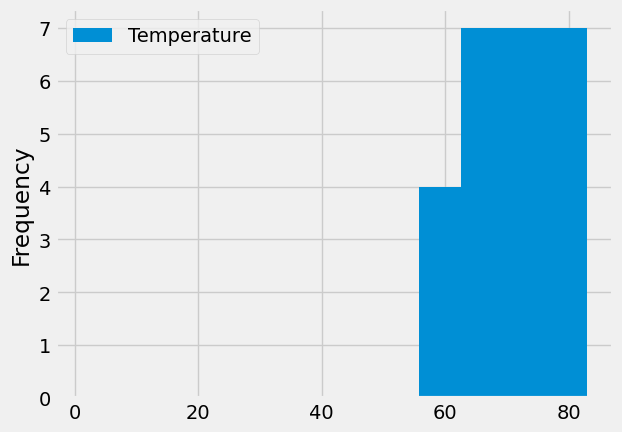

In [129]:
# Use Pandas Plotting with Matplotlib to plot the data
temp_df.plot(kind="hist", column="Temperature", bins=12, xlabel="Temperature", ylabel="Inches")

Text(0.5, 4.183333333333314, 'Temperature')

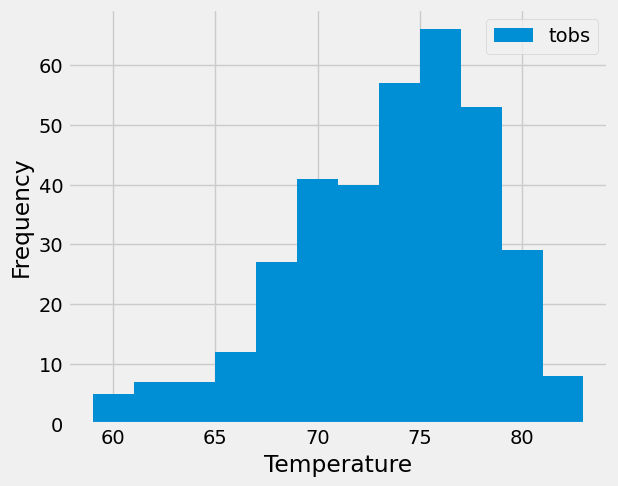

# Close Session

In [16]:
# Close Session
session.close()